# Patterns in the noise -  CLustering and Unsupervised Learning

If we just examine  financial market data consisting of stock price fluctuations over time, are there groups of stocks that fall and rise with a similar pattern?  
Or from an e-commerce business we might ask if are there groups of user accounts distisguished by patterns of similar purchasing activity?  
By identifying groups of related items using .... methods we can understand the data as a set of general patterns rather just individual points.  
This patters can help in making high-level summaries at the outset of a predictive modelling project, or the shape of the data.  
The output can serve as insights themselves, or they can provide starting points for other models.  
But today, we will talk about grouping or clustering algorithms, those are know unsupervised learning, it means, we have no response value, such as **sale price or clicking-trought rate**, which are used to determine the optimal parameters of the algorithm.<br>  
**Step 1:** identify similar datapoints using only the features.  
**Step 2:** Whether the clusters we identify share a common pattern in their responses.  
**Step 3:** So, suggets the cluster is useful in finding groups associated with the outcome we are interested in.  





Finding these clusters has steps which vary between algorithms:  
1) Is a notion of distance or similarity between items, which alows us to quantitatively compare thhem.
2) Number of groups we wish to identify, this can be using domain knowledge, or by running an algorithm with different numbers of clusters. This number is important because help us to describe a dataset through statistics, numerical variance within the groups determined by the algorithm, or visual inspection.  
<br>
So the goals are:  

> - Normalise data for use in a clustering algorithm, calculate similarity measures for categorical and numerical data. <br>
> - Use k-means clustering to identify the optimal number of clusters, using the quadratic error function.  
> - Use agglomerative clustering to identify clusters at different levels.
> - Use affinity propagation to automatically identify the number of clusters is a dataset.   
> - Use spectral methods to cluster data with non-linear relationships between points.  




## Step 1: Similarity and distance metrics

First step is to decide how to compare the similarity or dissimilarity between items. Can be according the properties of the data or according in our interests.  
There are methods of distance for:  
> - numerical, 
> - categorical, 
> - time series, 
> - and set-based data. 
> - Also, normalizations for different data types prior to running clustering algorithms.

### Numerical distance metrics

In [70]:
import pandas as pd
from sklearn import preprocessing
import sklearn.metrics.pairwise as pairwise
import datetime
import scipy.stats
#!pip install ucimlrepo

In [10]:
data_source = "https://raw.githubusercontent.com/SAURABHMASLEKAR/PCA-wine.csv/main/wine.csv"
data = pd.read_csv(data_source)
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


How is possible to calculate a similarity measurement between wines based on the information in each row? It means with data.describe()  
1. Would be to consider each of the wines as a point in a thirteen-dimensional space specified by its dimensions, each column.  
2. We cannot directly visualize a thirteen dimension space in a scatterplot to see if they are nearby, so, we can calculate distances for a more familiar 2 or 3 dimensional space using the Euclidean distance formula (length of the straight line between two points). This formula can be used whether the points are in a 2 or 13 -dimensional plot.  
<br>

> $ D(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $<br>
> - x and y are rows 
> - n is number of columns
> - An important aspect of Euclidean distance formula is that columns whose scale is much different from others can dominate the overall result of the calculation, i.e the mean of magnesium content is 100x aprox, so it can dominate. 

**PREVIOUS RESULTS 1:** The distance of these data-points would be clearly determined by the megnesium concentration.  
This might sometime be desirable, in the case of the column with the largest numerical values is the one we most care about for judging similarity.  
In most cases, this situation does not have favor, one feature over other, is better to give equal weight to all columns.  
<br>

**APPLYING EUCLIDEAN**<br>
**STEP 1**<br>
So for a fair distance comparison we need **normalize the columns**, because in this way all the columns fall into the same numerical range **(means have similar max and min values)**.  
<br>
How can we do this? 
> scale() function in scikit-learn. 

In [14]:
header_name = data.columns
print(header_name)

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')


In [15]:
#df_header = header_name

df_normalize = pd.DataFrame(preprocessing.scale(data[header_name[1:]]))
df_normalize.columns = header_name[1:]
df_normalize.describe()
#data_normalize.columns = header 

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


> - This function will subtract the mean value of a column from each element and then divide each point by the standard deviation of the column. The output give us a numpy array.   
> - This normalization centers the data in each column at mean 0 with variance.  
> - In this case od normally distributed data this results in a standard normal distribution.  
> - Now that we have scaled the data, we can calculate Euclidean distances between the rows using the following commands.


**STEP 2**

In [20]:
distances = pairwise.euclidean_distances(df_normalize)
print(distances)
print('-'*80)
print('The output is a square matrix of dimension:', distances.shape)

[[0.         3.49753522 3.02660794 ... 6.4909413  6.07878091 7.18442107]
 [3.49753522 0.         4.1429119  ... 6.39689969 6.09492714 7.36771922]
 [3.02660794 4.1429119  0.         ... 6.25367723 5.85179331 6.35388503]
 ...
 [6.4909413  6.39689969 6.25367723 ... 0.         1.82621785 3.39251526]
 [6.07878091 6.09492714 5.85179331 ... 1.82621785 0.         3.32427633]
 [7.18442107 7.36771922 6.35388503 ... 3.39251526 3.32427633 0.        ]]
--------------------------------------------------------------------------------
The output is a square matrix of dimension: (178, 178)


We have converted the dataset into a square matrix, given the distances between each of these rows. $Row_i$, $column_j$ represent the Euclidean distance between rows i and j in the dataset. Now, this **distance matrix**  is the input we will use for clustering inputs. 

To create a visualization of how the points are distributed relative to one another using a given distance metric, is possible to use **multidimensional scaling(MDS)**.  
This method attempts to find the set of lower dimensional coordinates (here using 2 dimensions) that best represents the distances between points in the original, higher dimensions of a dataset (here using the pairwise Euclidean distances we calculated from the 13 dismension)<br>


**STEP 3:**<br>
MDS finds the optimal 2-d coordinates according to the function.<br> For that we will use the distances calculated between points, the 2-d coordinates that minimize this function are found using **Singular Value Descomposition (SVD)**. After obtaining the coordinates from MDS, we can plot the results.<br>
<br>
The coordinates themselves have no interpretation (they change due to numerical randomness).  
Rather, it is the relative position of points that we are interested in: 

C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\1282274966.py:3: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0, color=data.Type[:], colormap='Reds')


<Axes: xlabel='1', ylabel='0'>

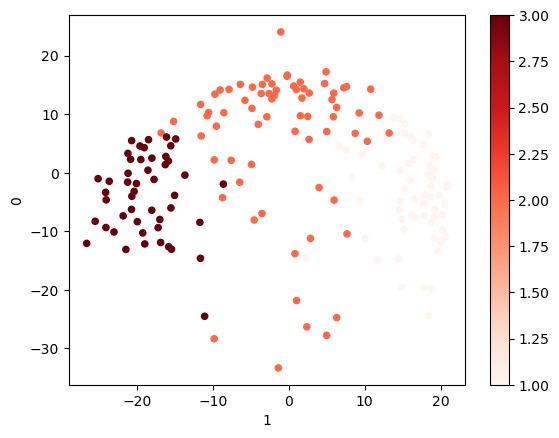

In [23]:
from sklearn.manifold import MDS
mds_coords = MDS().fit_transform(distances)
pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0, color=data.Type[:], colormap='Reds')

Is the Euclidean distance a good choice here? Visually, based on the multimdimensional scaling plot:<br>
> - There is separation between the classes based on the features we have used to calculate distance. Conceptually it appears that this is a reasonable choice in this case.
> - The decision also depends on what we are trying to compare. 
> - If we are interested in detecting wines with similar attributes in absolute values (absolute composition of the wine), then it is a good metric.
> - However, if that is not the interest, but what if we want to know whether its variables follow similar trends among wines with different alcohol contents? It mean not the absolute difference in values, but rather the **correlation between columns**. This is common for time series, so we consider that next.

# Correlation similarity metrics and time series

We are concerned with whether the patterns between series exhibit the same **variation over time, rather than their absolute differences in value.**
<br>
Comparing stocks, we might want to identify groups of stocks whose prices move up and down in similar patterns over time.
<br>
The absolute price is of less interest than this pattern of increase and decrease.
<br>
Example: Using the variation in prices of stocks in the Dow Jones Industrial Average (DJIA) over time.


In [42]:
data_stocks = "https://raw.githubusercontent.com/hashtag32/financial_forecasting/master/input/dow_jones_index.csv"
dataStocks = pd.read_csv(data_stocks)
dataStocks.head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [58]:

dataStocks.dtypes

quarter                                        int64
stock                                         object
date                                  datetime64[ns]
open                                          object
high                                          object
low                                           object
close                                         object
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                               object
next_weeks_close                              object
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object

All the numerical values (prices) are on the same scale, we won't normalize.<br>
Although we notice two issues.<br>
**First:** the closing price per week, this variabble is useful for the calculation of the correlation, is presented as string.
<br>
**Second:** The date is not present in the correct format for plotting.
<br>
**Solution:** Converting these columns to a float and datetime object, respectively. 

In [61]:
#Converting the closing price to a number, takes all characters but the dolar sign and casts it as a float.
#dataStocks.['close'] = dataStocks.['close'].apply(lambda x: float(x[1:]))
dataStocks.close = dataStocks.close.apply( lambda x: float(x[1:]))

In [43]:
#Converting the date, to split the string into a correct date format and casting them as integers to form a tuple input for a datetime object.
import datetime
dataStocks['date'] = dataStocks['date'].apply( lambda x: datetime.\
   datetime(int(x.split('/')[2]),int(x.split('/')[0]),int(x.split('/')[1])))

In [62]:
dataStocks.head()
#after this we can make a pivot table to place the closing prices for each week as columns and individual stocks as rows.


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [63]:
dataStocks_pivot = dataStocks.pivot('stock','date','close').reset_index()
dataStocks_pivot.head()

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2208875269.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dataStocks_pivot = dataStocks.pivot('stock','date','close').reset_index()


date,stock,2011-01-07 00:00:00,2011-01-14 00:00:00,2011-01-21 00:00:00,2011-01-28 00:00:00,2011-02-04 00:00:00,2011-02-11 00:00:00,2011-02-18 00:00:00,2011-02-25 00:00:00,2011-03-04 00:00:00,...,2011-04-21 00:00:00,2011-04-29 00:00:00,2011-05-06 00:00:00,2011-05-13 00:00:00,2011-05-20 00:00:00,2011-05-27 00:00:00,2011-06-03 00:00:00,2011-06-10 00:00:00,2011-06-17 00:00:00,2011-06-24 00:00:00
0,AA,16.42,15.97,15.79,16.13,17.14,17.37,17.28,16.68,16.58,...,16.97,17.00,17.15,17.10,16.26,16.48,15.92,15.28,14.72,15.23
1,AXP,44.36,46.25,46.00,43.86,43.82,46.75,45.53,43.53,43.72,...,47.11,49.08,50.20,49.49,51.19,51.13,49.28,47.74,48.50,48.34
2,BA,69.38,70.07,71.68,69.23,71.38,72.14,73.04,72.30,71.80,...,75.44,79.78,79.31,79.03,77.52,76.99,74.84,72.69,74.16,71.26
3,BAC,14.25,15.25,14.25,13.60,14.29,14.77,14.75,14.20,14.12,...,12.31,12.28,12.31,11.93,11.58,11.69,11.28,10.80,10.68,10.52
4,CAT,93.73,94.01,92.75,95.68,99.59,103.54,105.86,102.00,103.04,...,109.42,115.41,110.34,106.33,104.33,104.60,101.10,96.79,95.95,100.01


In [46]:
dataStocks_pivot.shape

(30, 26)

In [ ]:
#Now we know there are 6 months for a set of 30 stocks.

In [64]:
dataStocks_pivot.dtypes

date
stock                   object
2011-01-07 00:00:00    float64
2011-01-14 00:00:00    float64
2011-01-21 00:00:00    float64
2011-01-28 00:00:00    float64
2011-02-04 00:00:00    float64
2011-02-11 00:00:00    float64
2011-02-18 00:00:00    float64
2011-02-25 00:00:00    float64
2011-03-04 00:00:00    float64
2011-03-11 00:00:00    float64
2011-03-18 00:00:00    float64
2011-03-25 00:00:00    float64
2011-04-01 00:00:00    float64
2011-04-08 00:00:00    float64
2011-04-15 00:00:00    float64
2011-04-21 00:00:00    float64
2011-04-29 00:00:00    float64
2011-05-06 00:00:00    float64
2011-05-13 00:00:00    float64
2011-05-20 00:00:00    float64
2011-05-27 00:00:00    float64
2011-06-03 00:00:00    float64
2011-06-10 00:00:00    float64
2011-06-17 00:00:00    float64
2011-06-24 00:00:00    float64
dtype: object

We only two columns to calculate correlations between rows, as the first two columns are the index and stock ticker symbol.<br>
Let's calculate the correlation between these time series of stock prices by selecting the second column to end columns of the dataframe for each row.<br>
Calculating the pairwise correlations  distance metric, and visualizing it using MDS, as before:

C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='1', ylabel='0'>

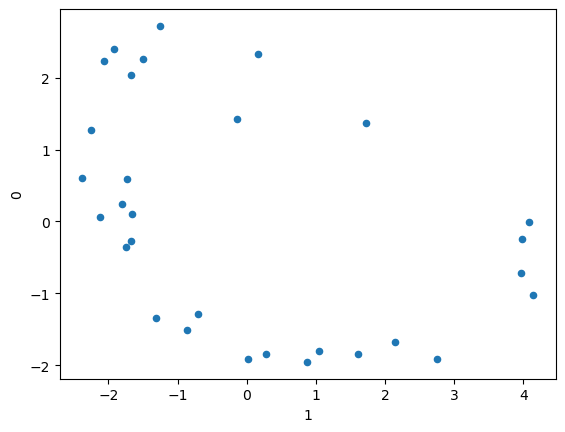

In [69]:
corr = np.corrcoef(np.float64(np.array(dataStocks_pivot)[:,2:]))
mds_coords = MDS().fit_transform(corr)
pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0)

The Pearson coefficient, which we have calculated here, is a measure of linear correlation between these time series. In other words, it captures the linear increase (or decrease) of the trend in one price relative to another, but won't necessarily capture nonlinear trends (such as a parabola or sigmoidal pattern). We can see this by looking at the formula for the Pearson correlation

Let us see if plotting the results using the Spearman correlation metric generates any differences in the pairwise distance of the stocks computed from MDS, using the following commands:

C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='1', ylabel='0'>

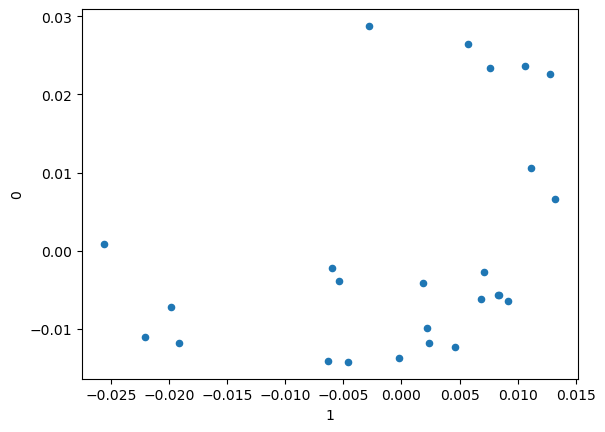

In [73]:
corr2 = scipy.stats.spearmanr(np.float64(np.array(dataStocks_pivot)[:,1:]))
mds_coords = MDS().fit_transform(corr2.correlation)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

The **Spearman** correlation distances, based on the x and y axes, **appear closer to each other than the Pearson** distances, suggesting from the perspective of rank correlation that the time series are more similar.

Pearson and Spearman correlations share the requirement that the two sets are of the same length. This is usually a reasonable assumption,

To compare time series of unequal lengths, we can use Dynamic Time Warping (DTW).

Conceptually, the idea of DTW is to warp one time series to align with a second, by allowing us to open gaps in either dataset so that it becomes the same size as the second. 

What the algorithm needs to resolve is where the most similar points of the two series are, so that gaps can be places in the appropriate locations.

We can use the FastDTW algorithm to compare the stocks data and plot the results again using MDS. <br> First we will compare pairwise each pair of stocks and record their DTW distance in a matrix:

We can use the FastDTW algorithm to compare the stocks data and plot the results again using MDS. First we will compare pairwise each pair of stocks and record their DTW distance in a matrix:

For computational efficiency (because the distance between i and j equals the distance between stocks j and i), we calculate only the upper triangle of this matrix. We then add the transpose (for example, the lower triangle) to this result to get the full distance matrix.

In [76]:
from fastdtw import fastdtw
dtw_matrix = np.zeros(shape=(dataStocks_pivot.shape[0],dataStocks_pivot.shape[0]))
for i in np.arange(0,dataStocks_pivot.shape[0]):
    for j in np.arange(i+1,dataStocks_pivot.shape[0]):
        dtw_matrix[i,j] = fastdtw(dataStocks_pivot.iloc[i,2:],dataStocks_pivot.iloc[j,2:])[0]

Finally, we can use MDS again to plot the results:

In [77]:
dtw_matrix+=dtw_matrix.transpose()

C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='1', ylabel='0'>

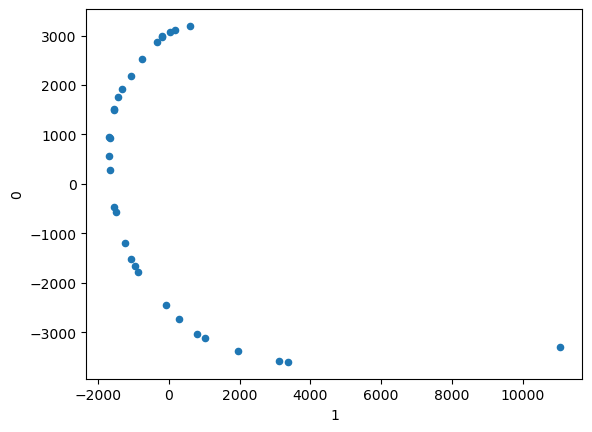

In [78]:
#Finally, we can use MDS again to plot the results:
mds_coords = MDS().fit_transform(dtw_matrix)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0) 

Compared to the distribution of coordinates along the x and y axis for Pearson correlation and rank correlation, **the DTW distances appear to span a wider range**, picking up more nuanced differences between the time series of stock prices.

Now, after evaluating numerical and time series analysis, let's go to calculate similarity measurements for categorical datasets.

# Similarity metrics for categorical data

If we open the data, we see that the keywords are represented as a string in one column, which we will need to convert into a n=binary vector:


In [101]:
data_paper = "https://raw.githubusercontent.com/PacktPublishing/Python-Advanced-Predictive-Analytics/master/Module%202/MasteringPredictiveAnalyticswithPython_Code/B04881_03_code/B04881_chapter03_code/B04881_chapter03_code/Papers.csv"
dataPaper = pd.read_csv(data_paper, sep=",")
dataPaper.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


We need to gather all the unique keywords, and assign a unique index to each of them to generate a new column name 'keword_n' for each keyword:

In [102]:
keywords_mapping = {}
keyword_index = 0

for k in dataPaper.keywords:
    k = k.split('\n')
    for Kw in k:
        if keywords_mapping.get(Kw, None) is None:
            keywords_mapping[Kw] = 'keyword_'+str(keyword_index)
            keyword_index+=1

We then generate a new set of columns using this key-word to column name mapping, to set a 1 in each row where the keyword appears in that article's keywords:


In [103]:
for (k,v) in keywords_mapping.items():
    dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0) 

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataPaper[v] = dataPaper.keywords.map( lambda x: 1 if k in x.split('\n') else 0)
C:\Users\ros22\AppData\Local\Temp\ipykernel_21744\2155052720.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

These columns will be appended to the right of the existing columns and we can select out these binary indicators using the iloc command, as before:

In [105]:
dataPaper.head().iloc[:,6:]

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,keyword_9,...,keyword_1391,keyword_1392,keyword_1393,keyword_1394,keyword_1395,keyword_1396,keyword_1397,keyword_1398,keyword_1399,keyword_1400
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> **Which method to use?**<br>
> Euclidean distance between articles could be computed, but because each coordinate is either 0 or 1, it does not provide the continuous distribution of distances we would like (we will get many ties, since there are only so many ways to add and subtract 1 and 0).
<br>
<br>
> Measurements of correlation between these binary vectors are less than ideal because the values can only be identical or non-identical, again leading to many duplicate correlation values.
<br>
<br>
>So, we can use Jaccard coefficient, Cosine or Hamming distance, Manhattan distance:
> 1. Jaccard coefficient: This is the number of intersecting items (positions where both a and b are set to 1 in our example) divided by the union (the total number of positions where either a or b are set to 1).This measure could be biased, however, if the articles have very different numbers of keywords, as a larger set of words will have a greater probability of being similar to another article. 
> 2. We could use the cosine similarity, which measure the angle between vectors and is sensitive to the number of elements in each cosine.
> 3. The Hamming distance which simply sums whether the elements of two sets are identical or not:  
<br>
Clearly, this measure will be best if we are primarily looking for matches and mismatches. It is also, like the Jaccard coefficient, sensitive to the number of items in each set, as simply increasing the number of elements increases the possible upper bound of the distance.
> 4. Similar to Hamming is the Manhattan distance, which does not require the data to be binary. If we use the Manhattan distance as an example, we can use MDS again to plot the arrangement of the documents in keyword space.

C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<Axes: xlabel='1', ylabel='0'>

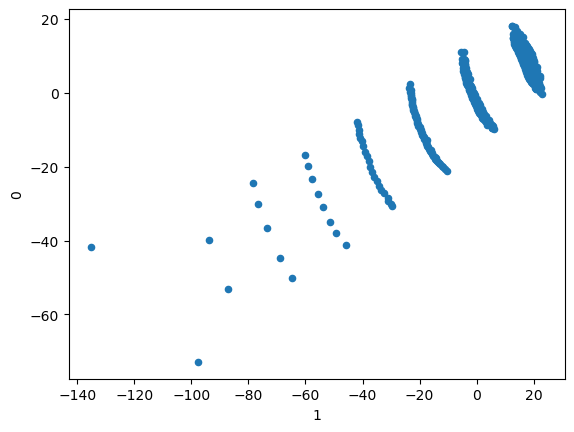

In [109]:
distances = pairwise.pairwise_distances(np.float64(np.array(dataPaper)[:,6:]), metric='manhattan')
mds_coords = MDS().fit_transform(distances)
pd.DataFrame(mds_coords).plot(kind='scatter', x=1, y=0)
